In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from math import log10, floor

In [5]:
Period = 3

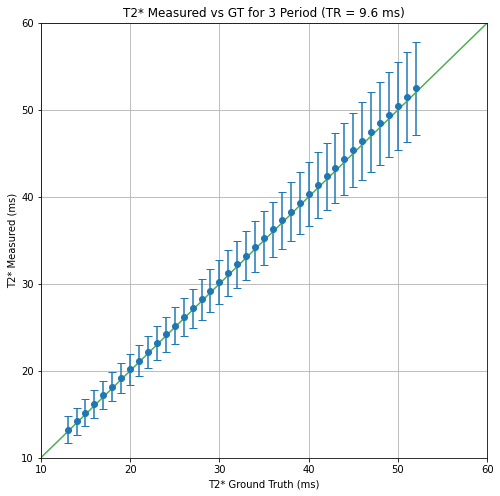

In [11]:

#Load Data
TR_n = 20
T2 = 44e-3
#T2* range 13 ms to 53 ms
T2s_min = 13
T2s_max = 53
T2p = np.asarray([], dtype = float)

for i in range (T2s_min, T2s_max):
    T2p = np.append(T2p, 1/((1000/i)-1/T2))
TR = np.asarray([], dtype = float)
TR_min = 2e-3
TR_max = 10e-3
TR_increment = (TR_max-TR_min)/TR_n
for i in range (0, TR_n):
    TR = np.append(TR, TR_min+TR_increment*i)
    
T2Star_GT = np.asarray([], dtype = float)
for T2_inhom in T2p:
        #Store Ground truth T2*------------------------------------
        T2Star_GT = np.append(T2Star_GT, 1/((1/T2)+(1/T2_inhom)))
        
ErrorMeanfigdata = np.load("./Figure/"+str(Period)+"Period_0.05Noise_"+str(TR_n)+"TRs/"+str(Period)+"PeriodData_0.05Noise_ErrorMean.npy")
Errorstdfigdata = np.load("./Figure/"+str(Period)+"Period_0.05Noise_"+str(TR_n)+"TRs/"+str(Period)+"PeriodData_0.05Noise_Errorstd.npy")
Biasfigdata = np.load("./Figure/"+str(Period)+"Period_0.05Noise_"+str(TR_n)+"TRs/"+str(Period)+"PeriodData_0.05Noise_Bias.npy")
Meanfigdata = np.load("./Figure/"+str(Period)+"Period_0.05Noise_"+str(TR_n)+"TRs/"+str(Period)+"PeriodData_0.05Noise_Mean.npy")


#Plot to see T2* accuracy at different TRs
from IPython.display import clear_output

for i in range(0,20):
    fig, ax = plt.subplots(figsize = (8,8))
    ax.errorbar(T2Star_GT*1e3,Meanfigdata[i,:]*1e3,fmt='o', yerr=Errorstdfigdata[i,:]*1e3,capsize=4)
    ax.set_xlabel("T2* Ground Truth (ms)")
    ax.set_ylabel("T2* Measured (ms)")
    ax.set_title("T2* Measured vs GT for "+str(Period)+" Period (TR = "+str(round(TR[i]*1e3, 3-int(floor(log10(abs(TR[i]*1e3))))-1))+" ms)")
    x1 = np.array([-20,60])
    y1 = np.array([-20,60])
    ax.plot(x1,y1,c = '#4CAF50')
    ax.set_xlim(10, 60)
    ax.set_ylim(10, 60)
    ax.grid()
    plt.show()
    clear_output(wait=True)
    #fig.savefig("./Figure/"+str(Period)+"Period_0.05Noise_"+str(TR_n)+"TRs/T2StarAccuracy_"+str(Period)+"_Period_TR_"+str(round(TR[i]*1e3, 3-int(floor(log10(abs(TR[i]*1e3))))-1))+"_ms.jpg")
plt.show()

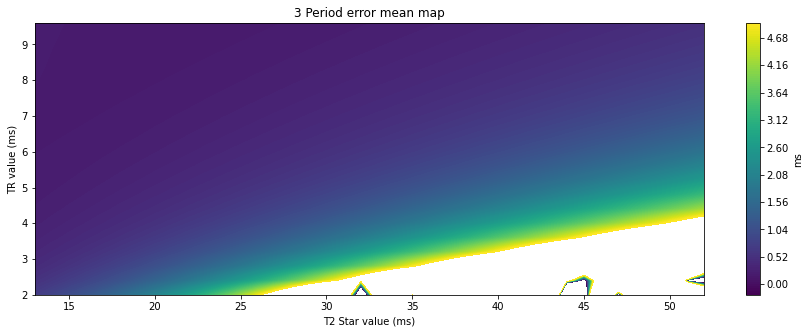

In [10]:
errormeancb = np.asarray([],dtype = float)
for i in range(-5,125):
    errormeancb = np.append(errormeancb, 0.04*i)
errormap, mapax = plt.subplots(figsize = (15,5))

contourImage = mapax.contourf(T2Star_GT*1e3,TR*1e3,ErrorMeanfigdata*1e3,errormeancb)
c_map_m = errormap.colorbar(contourImage, ax=mapax)
c_map_m.set_label("ms")

mapax.set_xlabel("T2 Star value (ms)")
mapax.set_ylabel("TR value (ms)")
mapax.set_title(str(Period)+" Period error mean map")
plt.savefig("./Figure/FinalPlots/"+str(Period)+"Period_TR_T2StarMeanErrorMap.jpg")

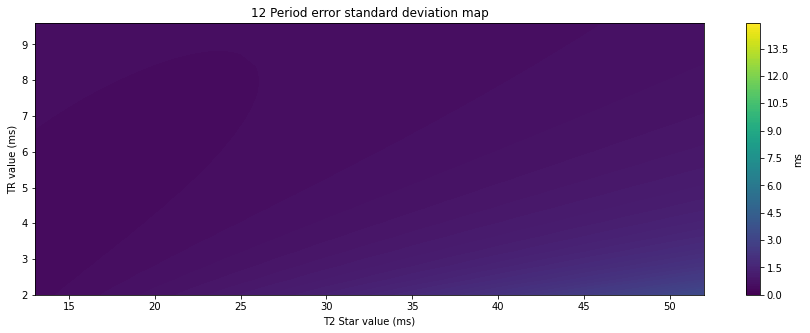

In [63]:
errorstdcb = np.asarray([],dtype = float)
for i in range(0,150):
    errorstdcb = np.append(errorstdcb, 0.1*i)
errorstdmap, std_mapax = plt.subplots(figsize = (15,5))

contourImage = std_mapax.contourf(T2Star_GT*1e3,TR*1e3,Errorstdfigdata*1e3,errorstdcb)
c_bar_sd = errorstdmap.colorbar(contourImage, ax=std_mapax)
c_bar_sd.set_label("ms")

std_mapax.set_xlabel("T2 Star value (ms)")
std_mapax.set_ylabel("TR value (ms)")
std_mapax.set_title(str(Period)+" Period error standard deviation map")
plt.savefig("./Figure/FinalPlots/"+str(Period)+"Period_TR_T2StarErrorSDMap.jpg")

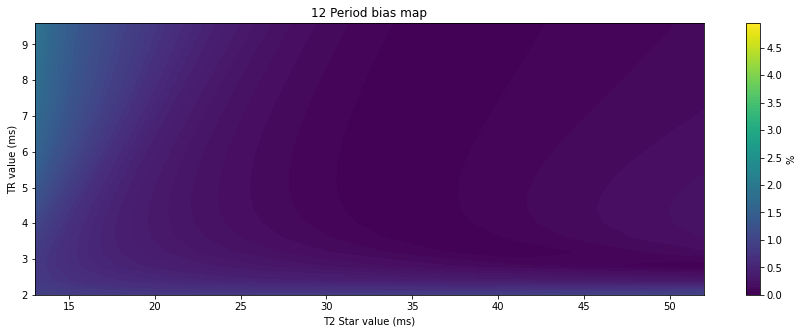

In [64]:
biascb = np.asarray([],dtype = float)
for i in range(0,100):
    biascb = np.append(biascb, 0.05*i)
biasmap, bias_mapax = plt.subplots(figsize = (15,5))

contourImage = bias_mapax.contourf(T2Star_GT*1e3,TR*1e3,np.abs(Biasfigdata)*100,biascb)
c_bar_b = biasmap.colorbar(contourImage, ax=bias_mapax)
c_bar_b.set_label("%")
bias_mapax.set_xlabel("T2 Star value (ms)")
bias_mapax.set_ylabel("TR value (ms)")
bias_mapax.set_title(str(Period)+" Period bias map")
plt.savefig("./Figure/FinalPlots/"+str(Period)+"Period_TR_T2StarBiasMap.jpg")